## Import

In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import pandas as pd #collection of functions for data processing and analysis 
print("pandas version: {}". format(pd.__version__))
import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 
import sklearn #collection of machine learning algorithms
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import warnings; warnings.simplefilter('ignore')

# Time relative
from datetime import datetime, timedelta

# Geospatial data
import folium

#Write in Latex format in the notebook
from IPython.display import display, Math, Latex


####################################################################################################
#                                         MACHINE LEARNING
####################################################################################################

# Model Utilities
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix,roc_curve, precision_recall_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing , decomposition , neighbors
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Statistics & Maths
import scipy
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy import stats
from math import pi
from math import *

####################################################################################################
#                                   RELATIVE TO DATA VIZ & DISPLAYING
####################################################################################################

# matplot/seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import cm
import seaborn as sns

#plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

#Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 10,10
plt.rcParams.update({'font.size': 14})
sns.set_style("whitegrid")

# display row, column number
pd.options.display.max_columns = 500
pd.options.display.max_rows = 2500

Python version: 3.8.10 (default, Jun  2 2021, 10:49:15) 
[GCC 9.4.0]
pandas version: 1.2.2
matplotlib version: 3.3.4
NumPy version: 1.20.1
SciPy version: 1.6.0
IPython version: 7.20.0


## Loading File

In [2]:
path = "/home/wils/Data_Project/Data"   #os.getcwd()

In [3]:
raw_data_country = pd.read_csv(path +"/EdStatsCountry.csv")

In [4]:
raw_stats = pd.read_csv(path +"/EdStatsData.csv")

### Fichier Country

In [5]:
raw_data_country.shape

(241, 32)

In [6]:
raw_data_country.drop(["Unnamed: 31"], axis=1, inplace=True)

In [7]:
raw_data_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [8]:
raw_data_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [9]:
raw_data_country.isnull().sum()* 100 / len(raw_data_country)

Country Code                                          0.000000
Short Name                                            0.000000
Table Name                                            0.000000
Long Name                                             0.000000
2-alpha code                                          1.244813
Currency Unit                                        10.788382
Special Notes                                        39.834025
Region                                               11.203320
Income Group                                         11.203320
WB-2 code                                             0.414938
National accounts base year                          14.937759
National accounts reference year                     86.721992
SNA price valuation                                  18.257261
Lending category                                     40.248963
Other groups                                         75.933610
System of National Accounts                          10

<AxesSubplot:title={'center':'Répartition des valeurs manquantes'}>

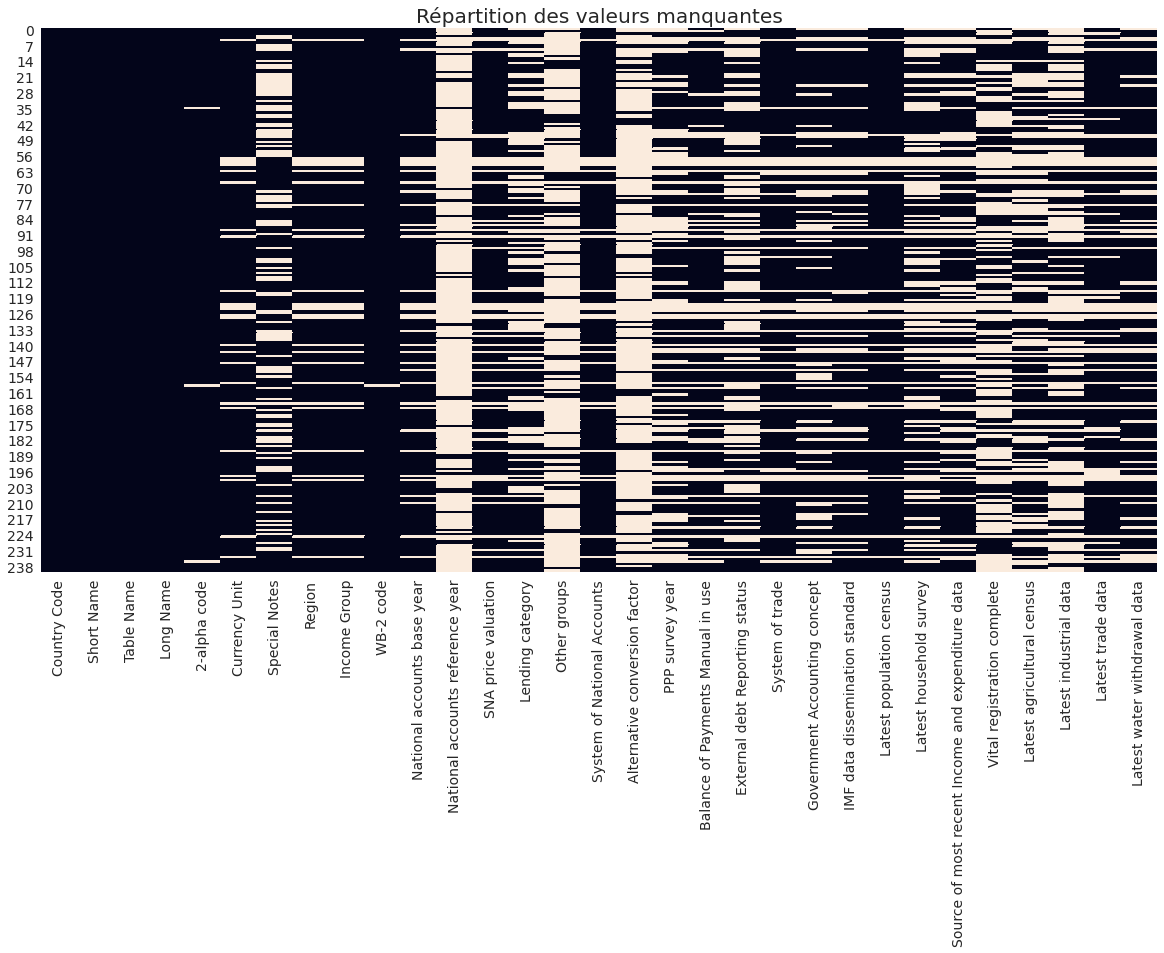

In [22]:
plt.figure(figsize=(20,10))
plt.title('Répartition des valeurs manquantes')
sns.heatmap(raw_data_country.isna(), cbar=False)

In [50]:
raw_data_country.isna()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,True,False,True,False,True,True,False,True,True,False,True,True,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,False,True,True,False,True
5,False,False,False,False,False,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,True,False,True,False,False,False,False,True,True,True,False,True,False,False
7,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,True,False,False,False,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,True,False,False,True,True,True


<AxesSubplot:>

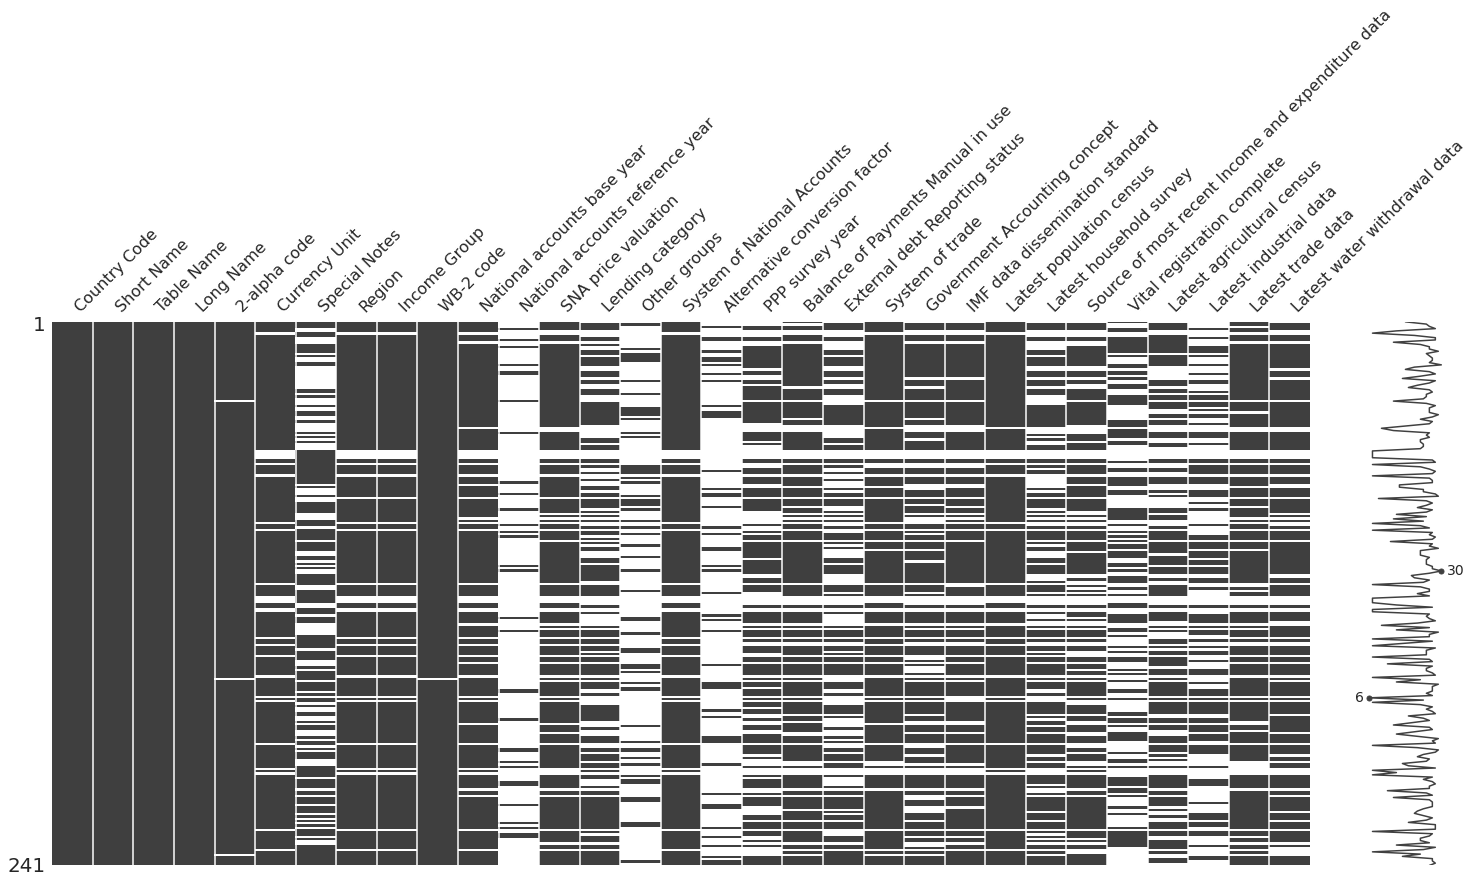

In [11]:
import missingno as msno
msno.matrix(raw_data_country)

<AxesSubplot:>

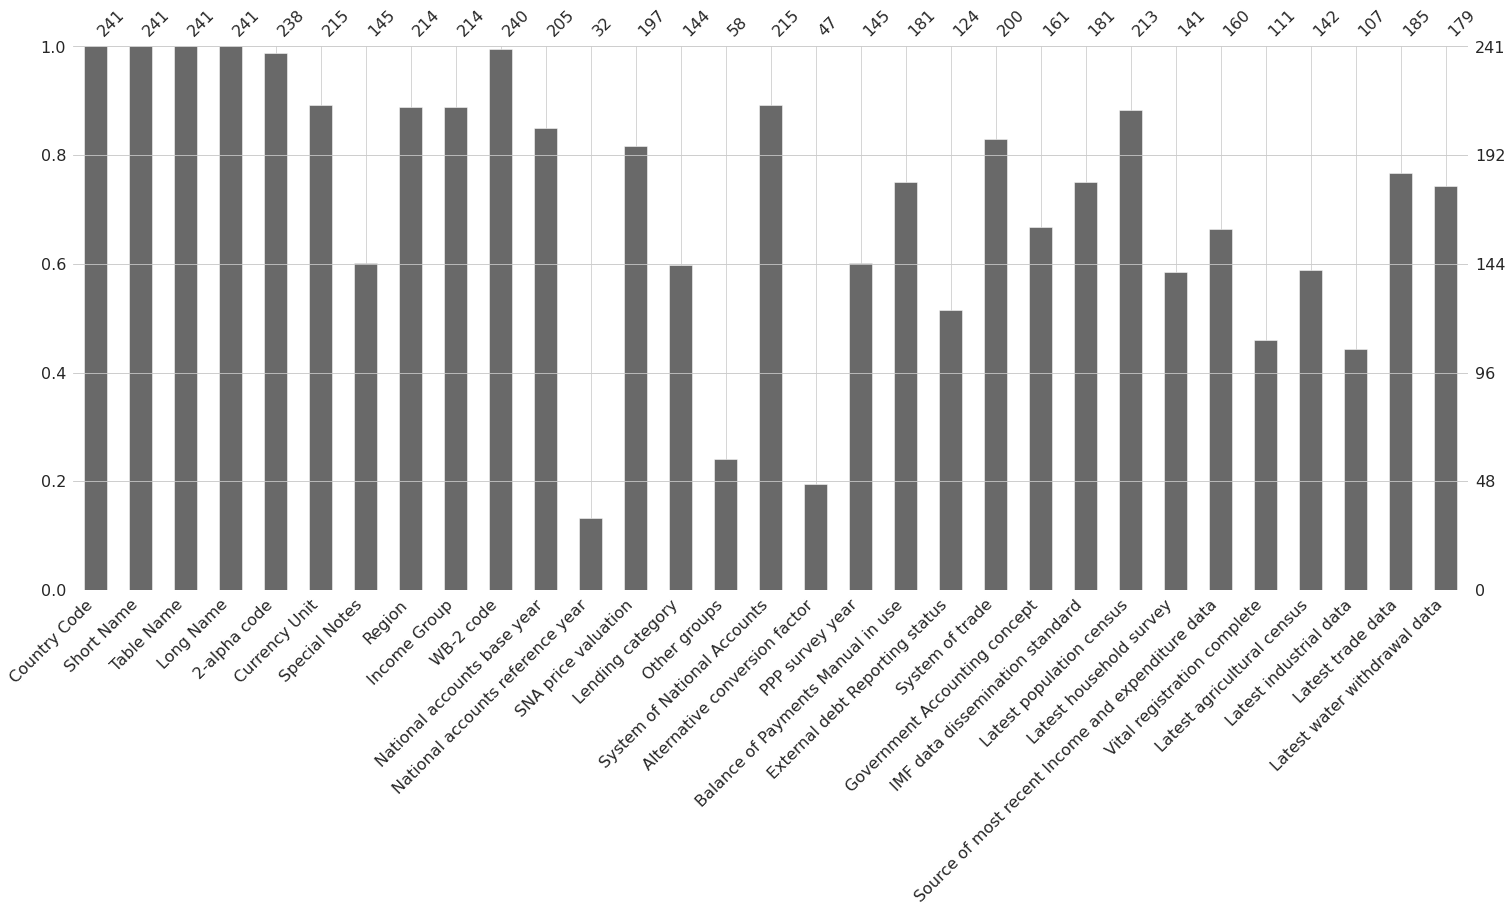

In [12]:
msno.bar(raw_data_country, p=True)

In [13]:
raw_stats.duplicated().value_counts()

False    886930
dtype: int64

### Fichier EdStatsData

In [14]:
raw_stats.shape

(886930, 70)

In [15]:
raw_stats.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
raw_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [17]:
raw_stats.isnull().sum()* 100 / len(raw_stats)

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
1971               95.993258
1972               95.984012
1973               95.992356
1974               95.971497
1975               90.156382
1976               95.773849
1977               95.763589
1978               95.763364
1979               95.849842
1980               89.951631
1981               95.627953
1982               95.770692
1983               95.663694
1984               95.647233
1985               89.819264
1986               95.560867
1987               95.643286
1988               95.653321
1989               95.767422
1990               85.973527
1991               91.607342
1992               91.482642
1993               91.454455
1994               91.266278
1995               85.189248
1996               91.340128
1997               91.718287
1998               90.426076
1999               86.601085
2000          

<AxesSubplot:>

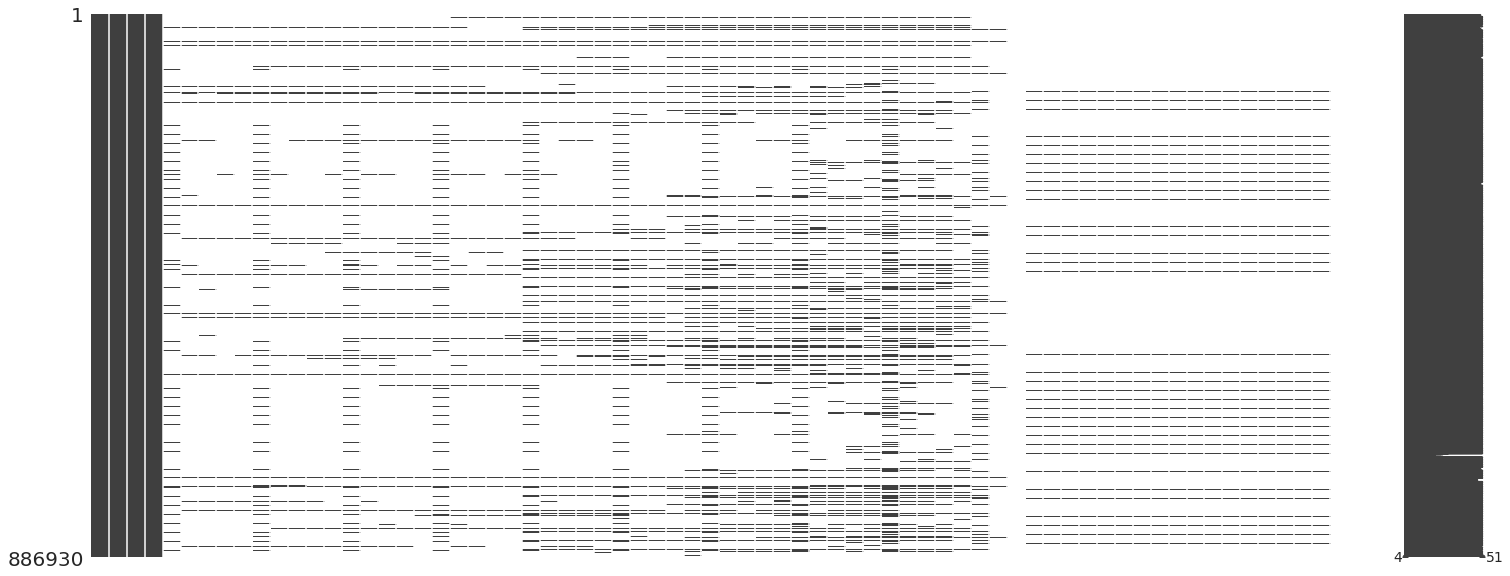

In [18]:
msno.matrix(raw_stats)

<AxesSubplot:>

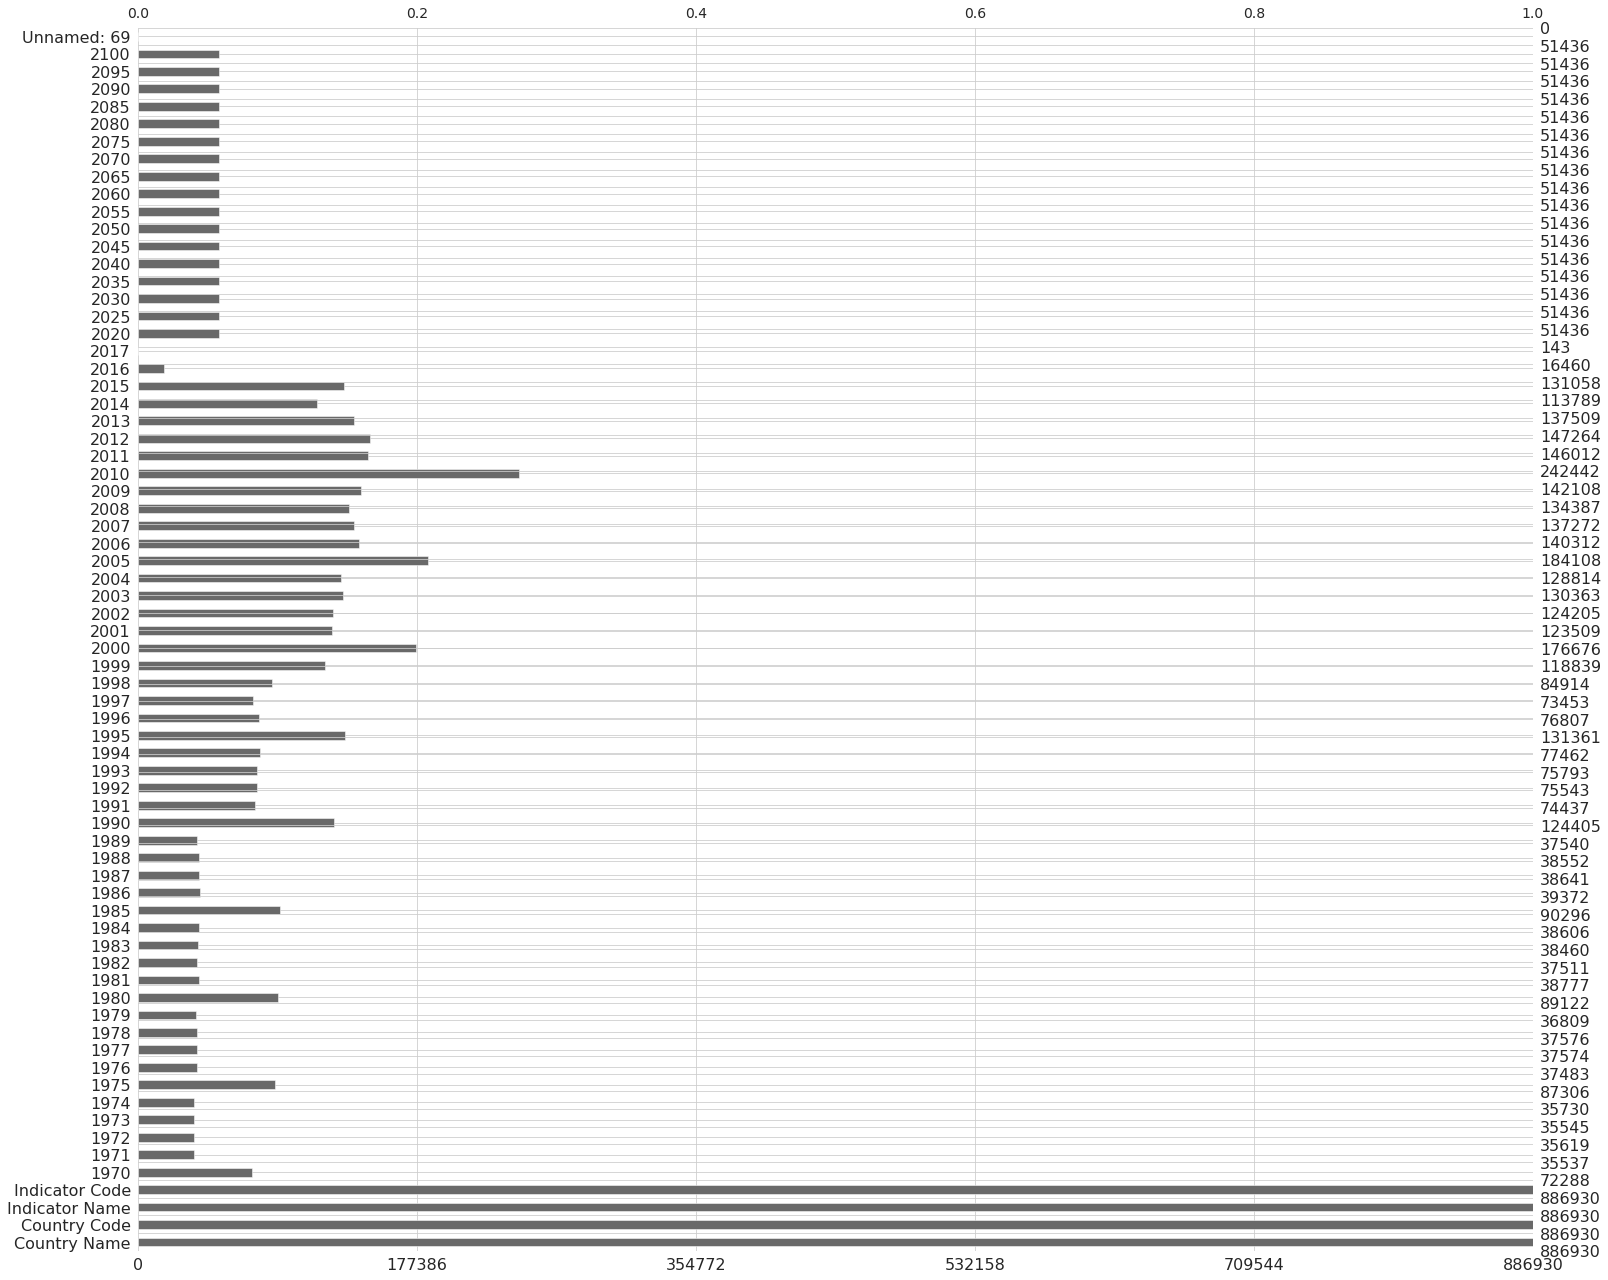

In [19]:
msno.bar(raw_stats)

### Cleaning and filtering

In [23]:
# Delete last row
raw_stats.drop(columns='Unnamed: 69', inplace=True)

# Keep year 1999 to 2015
raw_stats.drop(raw_stats.loc[:, '1970':'1998'], axis=1, inplace=True)
raw_stats.drop(raw_stats.loc[:, '2016':'2100'], axis=1, inplace=True)

<AxesSubplot:>

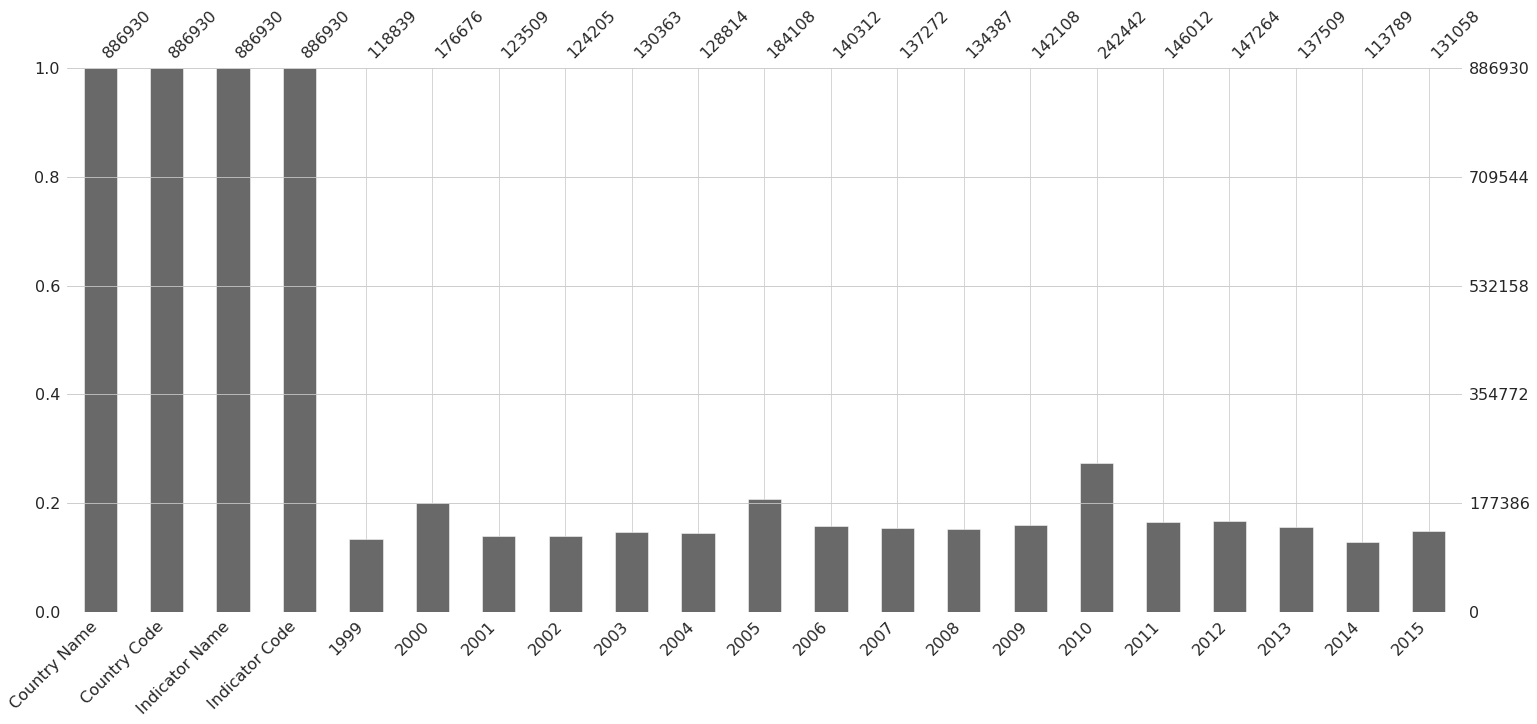

In [24]:
# Visualisation des valeurs non nulles
msno.bar(raw_stats) 

In [30]:
Choise_indicators = ['GDP per capita (current US$)',
                          'Internet users (per 100 people)',
                          'Population, total',
                          'Population of the official age for upper secondary education, both sexes ''(number)'
                         ]

In [33]:
raw_stats_indicators = raw_stats[raw_stats['Indicator Name'].isin(Choise_indicators)]
raw_stats_indicators.shape

(968, 21)

In [35]:
raw_stats_indicators

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2.332064e+03,2.615683e+03,2.515078e+03,2.499335e+03,2.754305e+03,3.168186e+03,3.796022e+03,4.414093e+03,5.046817e+03,6.255761e+03,5.267553e+03,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,5.985821e-01,1.139541e+00,1.561288e+00,2.693061e+00,3.645881e+00,7.006812e+00,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN
2332,Arab World,ARB,Population of the official age for upper secon...,SP.SEC.UTOT.IN,1.870701e+07,1.911064e+07,1.950031e+07,1.995870e+07,2.037157e+07,2.070675e+07,2.093355e+07,2.116101e+07,2.137070e+07,2.149093e+07,2.153743e+07,2.155430e+07,2.154900e+07,2.157159e+07,2.159408e+07,2.157668e+07,NaN
2533,Arab World,ARB,"Population, total",SP.POP.TOTL,2.719130e+08,2.775614e+08,2.834931e+08,2.896810e+08,2.960959e+08,3.028247e+08,3.098244e+08,3.171258e+08,3.246935e+08,3.324249e+08,3.401490e+08,3.477370e+08,3.551370e+08,3.624666e+08,3.697615e+08,NaN,NaN
4910,East Asia & Pacific,EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,3.784781e+03,4.055709e+03,3.738690e+03,3.766856e+03,4.108866e+03,4.572447e+03,4.842265e+03,5.099524e+03,5.664143e+03,6.495933e+03,6.648005e+03,7.679834e+03,8.844823e+03,9.402723e+03,9.447701e+03,9.665056e+03,9.541871e+03
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,3.406408e+00,5.592680e+00,7.252166e+00,8.993588e+00,1.054724e+01,1.259696e+01,1.466636e+01,1.661783e+01,2.076652e+01,2.525357e+01,2.951320e+01,3.423084e+01,3.736516e+01,4.070935e+01,4.457735e+01,4.681210e+01,4.978792e+01
5997,East Asia & Pacific,EAS,Population of the official age for upper secon...,SP.SEC.UTOT.IN,9.590882e+07,9.804027e+07,1.019102e+08,1.066272e+08,1.118714e+08,1.163857e+08,1.187824e+08,1.179102e+08,1.143261e+08,1.100124e+08,1.058188e+08,1.014630e+08,9.751709e+07,9.392163e+07,9.002472e+07,8.635070e+07,NaN
6198,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,2.025301e+09,2.044496e+09,2.063002e+09,2.080535e+09,2.097265e+09,2.113465e+09,2.129445e+09,2.145245e+09,2.160432e+09,2.175832e+09,2.190811e+09,2.205615e+09,2.220358e+09,2.235430e+09,2.250552e+09,2.265898e+09,2.281203e+09
8575,East Asia & Pacific (excluding high income),EAP,GDP per capita (current US$),NY.GDP.PCAP.CD,8.831081e+02,9.627563e+02,1.014173e+03,1.113114e+03,1.249653e+03,1.436510e+03,1.649929e+03,1.972180e+03,2.474915e+03,3.108735e+03,3.348193e+03,4.010465e+03,4.867117e+03,5.390929e+03,5.908428e+03,6.307579e+03,6.515050e+03
8705,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,8.533516e-01,1.897116e+00,2.779090e+00,4.404990e+00,5.762102e+00,6.885265e+00,8.319143e+00,1.017397e+01,1.438269e+01,1.926014e+01,2.376924e+01,2.895757e+01,3.238576e+01,3.606835e+01,3.970893e+01,4.206223e+01,4.521010e+01


<AxesSubplot:>

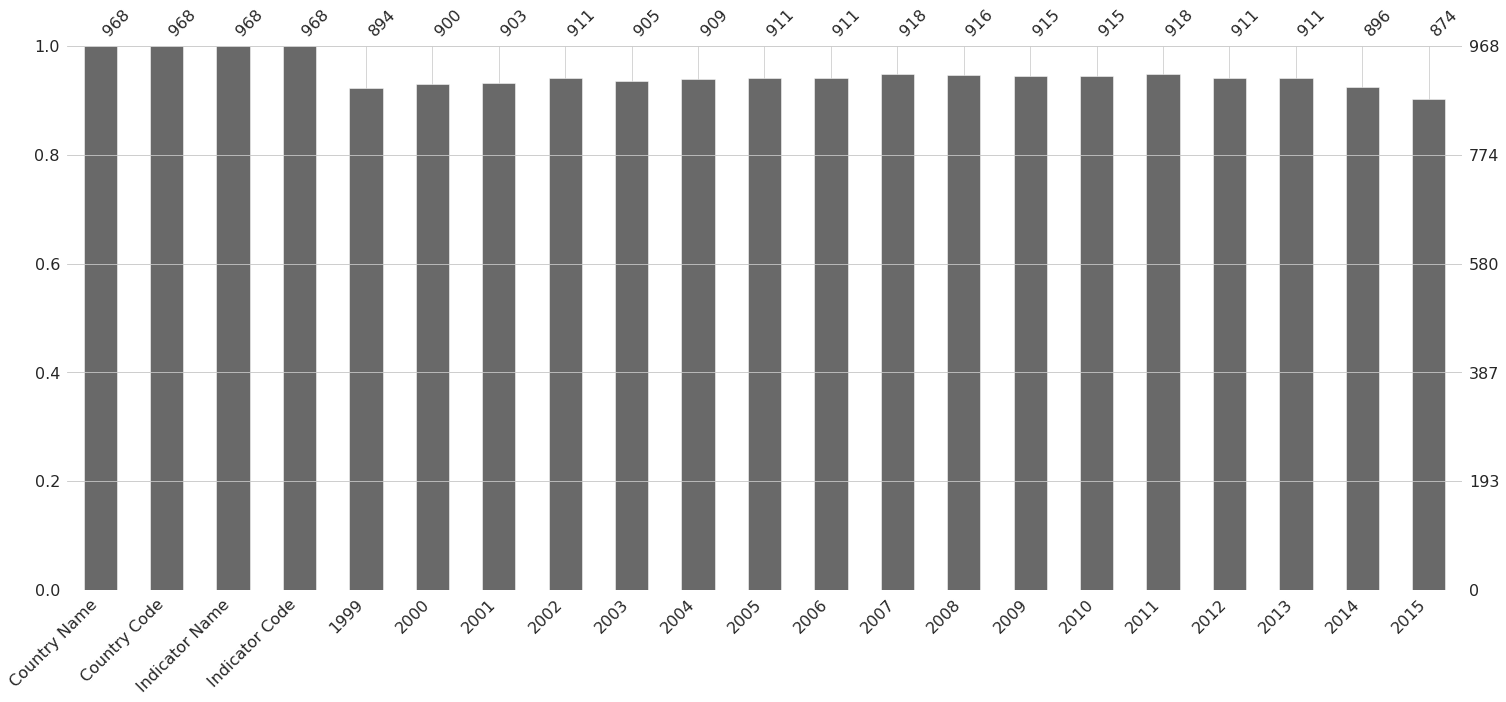

In [36]:
msno.bar(raw_stats_indicators) 

In [40]:
countries_liste = ["France","Mexico","Senegal","Singapore","Tonga",
                   "Ukraine","United Kingdom","United States","Uruguay","Vietnam"]
raw_stats_reduce = raw_stats_indicators[raw_stats_indicators['Country Name'].isin(countries_liste)]
raw_stats_reduce.shape

(40, 21)

In [46]:
df_result = pd.merge(raw_stats_reduce, raw_data_country[["Country Code","Region"]], on="Country Code", how="left")
df_result = df_result.drop("Indicator Code", axis=1)
df_result

,Country Name,Country Code,Indicator Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region
0,France,FRA,GDP per capita (current US$),2.479930e+04,2.246564e+04,2.252732e+04,2.427524e+04,2.969118e+04,3.387474e+04,3.487973e+04,3.654451e+04,4.160058e+04,4.541307e+04,4.163113e+04,4.070334e+04,4.381020e+04,4.083802e+04,4.255412e+04,4.295524e+04,3.652677e+04,Europe & Central Asia
1,France,FRA,Internet users (per 100 people),9.125318e+00,1.430792e+01,2.632590e+01,3.018000e+01,3.614000e+01,3.915000e+01,4.287000e+01,4.687000e+01,6.609000e+01,7.068000e+01,7.158000e+01,7.728000e+01,7.782000e+01,8.144000e+01,8.191980e+01,8.375000e+01,8.469450e+01,Europe & Central Asia
2,France,FRA,Population of the official age for upper secon...,2.319498e+06,2.346482e+06,2.355432e+06,2.353627e+06,2.354301e+06,2.359178e+06,2.359869e+06,2.350175e+06,2.325686e+06,2.298182e+06,2.274301e+06,2.259386e+06,2.257825e+06,2.249564e+06,2.252936e+06,2.264305e+06,2.283374e+06,Europe & Central Asia
3,France,FRA,"Population, total",6.049672e+07,6.091250e+07,6.135743e+07,6.180527e+07,6.224488e+07,6.270490e+07,6.317936e+07,6.362138e+07,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,Europe & Central Asia
4,Mexico,MEX,GDP per capita (current US$),5.777232e+03,6.720902e+03,7.031379e+03,7.106082e+03,6.751999e+03,7.199060e+03,7.986798e+03,8.767920e+03,9.330342e+03,9.689053e+03,7.748123e+03,8.959581e+03,9.834473e+03,9.820533e+03,1.029887e+04,1.045278e+04,9.152872e+03,Latin America & Caribbean
5,Mexico,MEX,Internet users (per 100 people),1.857436e+00,5.081384e+00,7.038023e+00,1.190000e+01,1.290000e+01,1.410000e+01,1.721000e+01,1.952000e+01,2.081000e+01,2.171000e+01,2.634000e+01,3.105000e+01,3.717630e+01,3.975000e+01,4.346000e+01,4.439000e+01,5.743104e+01,Latin America & Caribbean
6,Mexico,MEX,Population of the official age for upper secon...,6.367056e+06,6.397627e+06,6.440184e+06,6.452567e+06,6.468253e+06,6.490877e+06,6.528043e+06,6.584296e+06,6.660726e+06,6.743337e+06,6.827592e+06,6.909111e+06,6.983764e+06,7.049175e+06,7.107633e+06,7.154249e+06,7.180821e+06,Latin America & Caribbean
7,Mexico,MEX,"Population, total",1.003006e+08,1.017197e+08,1.030671e+08,1.043556e+08,1.056405e+08,1.069956e+08,1.084722e+08,1.100924e+08,1.118363e+08,1.136618e+08,1.155052e+08,1.173189e+08,1.190900e+08,1.208283e+08,1.225360e+08,1.242216e+08,1.258909e+08,Latin America & Caribbean
8,Senegal,SEN,GDP per capita (current US$),5.332851e+02,4.734500e+02,4.812870e+02,5.130262e+02,6.427663e+02,7.330582e+02,7.738699e+02,8.098038e+02,9.503979e+02,1.101202e+03,1.021038e+03,1.002530e+03,1.081939e+03,1.038078e+03,1.051751e+03,1.052127e+03,9.107748e+02,Sub-Saharan Africa
9,Senegal,SEN,Internet users (per 100 people),3.110910e-01,4.039675e-01,9.837941e-01,1.006455e+00,2.101436e+00,4.386024e+00,4.786684e+00,5.611739e+00,6.890000e+00,7.120000e+00,7.500000e+00,8.000000e+00,9.800000e+00,1.080000e+01,1.310000e+01,1.770000e+01,2.169026e+01,Sub-Saharan Africa


<AxesSubplot:>

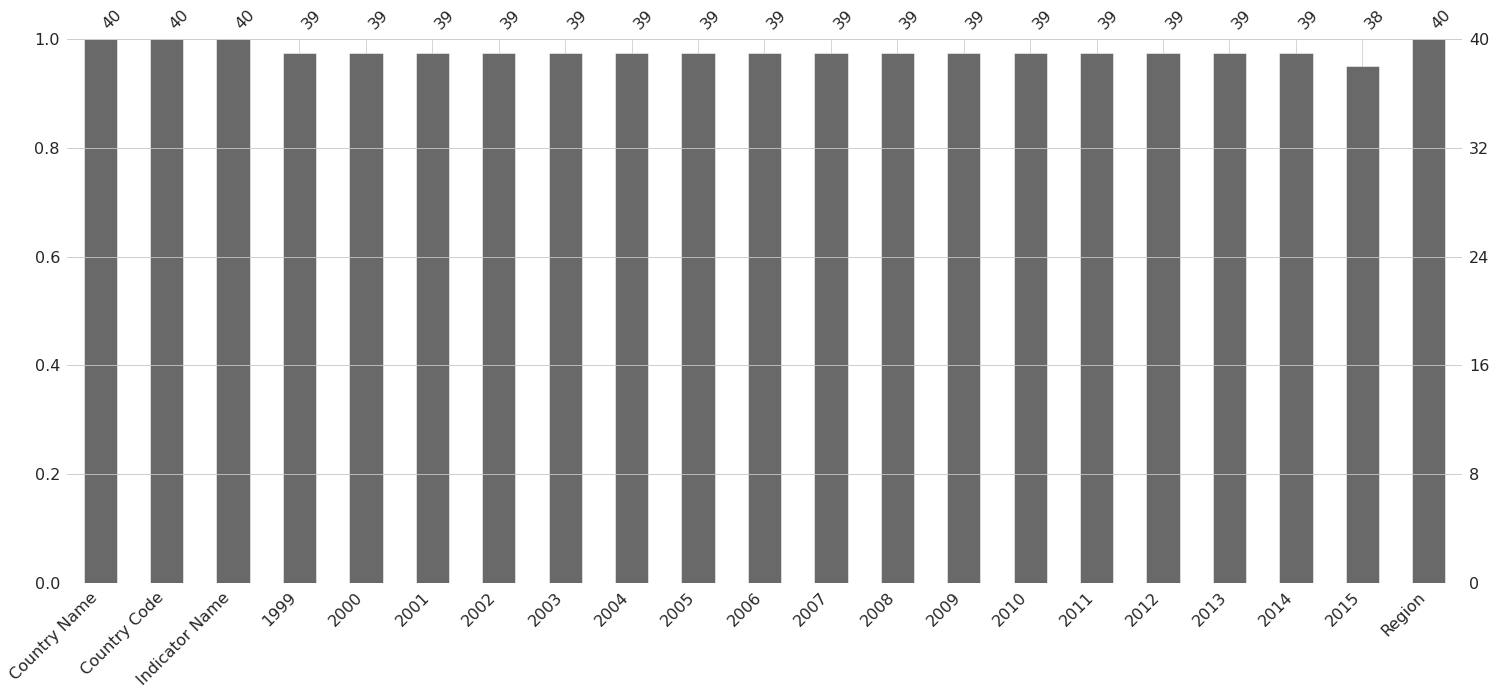

In [47]:
msno.bar(df_result) 

<AxesSubplot:>

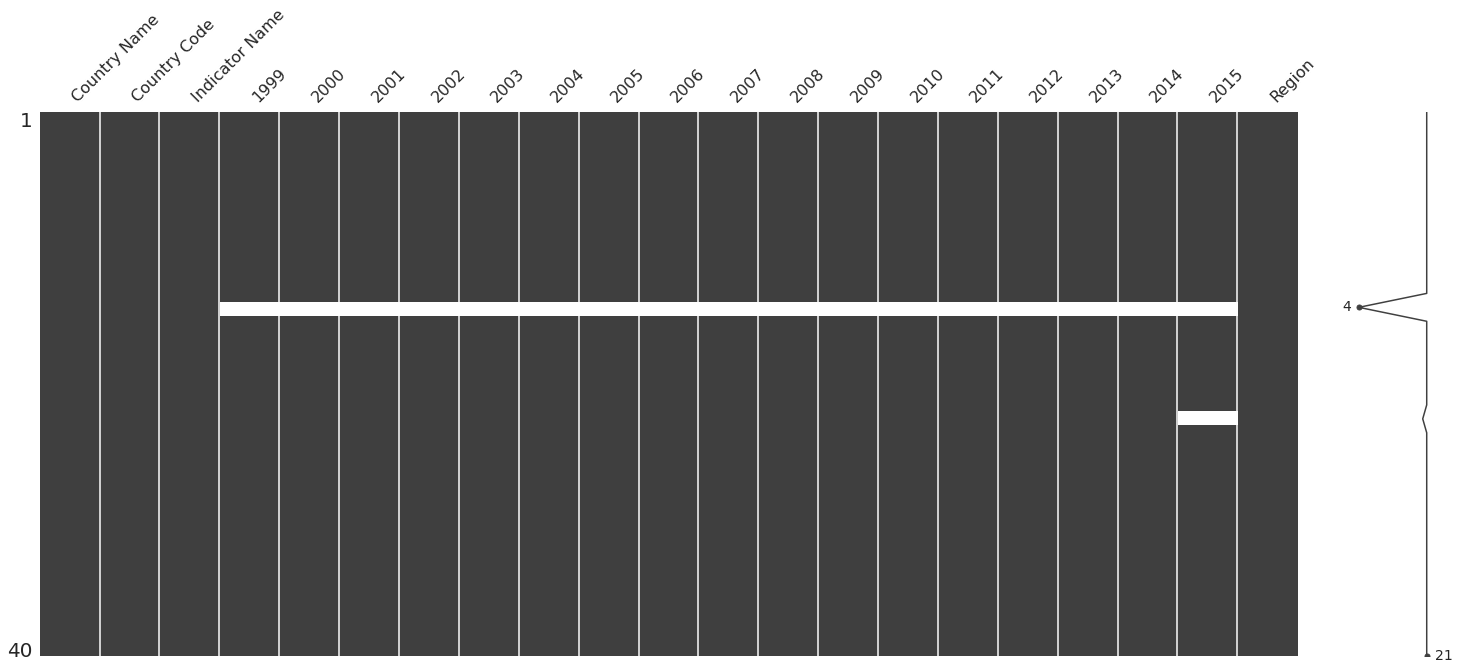

In [48]:
msno.matrix(df_result)

In [49]:
df_result

,Country Name,Country Code,Indicator Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region
0,France,FRA,GDP per capita (current US$),2.479930e+04,2.246564e+04,2.252732e+04,2.427524e+04,2.969118e+04,3.387474e+04,3.487973e+04,3.654451e+04,4.160058e+04,4.541307e+04,4.163113e+04,4.070334e+04,4.381020e+04,4.083802e+04,4.255412e+04,4.295524e+04,3.652677e+04,Europe & Central Asia
1,France,FRA,Internet users (per 100 people),9.125318e+00,1.430792e+01,2.632590e+01,3.018000e+01,3.614000e+01,3.915000e+01,4.287000e+01,4.687000e+01,6.609000e+01,7.068000e+01,7.158000e+01,7.728000e+01,7.782000e+01,8.144000e+01,8.191980e+01,8.375000e+01,8.469450e+01,Europe & Central Asia
2,France,FRA,Population of the official age for upper secon...,2.319498e+06,2.346482e+06,2.355432e+06,2.353627e+06,2.354301e+06,2.359178e+06,2.359869e+06,2.350175e+06,2.325686e+06,2.298182e+06,2.274301e+06,2.259386e+06,2.257825e+06,2.249564e+06,2.252936e+06,2.264305e+06,2.283374e+06,Europe & Central Asia
3,France,FRA,"Population, total",6.049672e+07,6.091250e+07,6.135743e+07,6.180527e+07,6.224488e+07,6.270490e+07,6.317936e+07,6.362138e+07,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,Europe & Central Asia
4,Mexico,MEX,GDP per capita (current US$),5.777232e+03,6.720902e+03,7.031379e+03,7.106082e+03,6.751999e+03,7.199060e+03,7.986798e+03,8.767920e+03,9.330342e+03,9.689053e+03,7.748123e+03,8.959581e+03,9.834473e+03,9.820533e+03,1.029887e+04,1.045278e+04,9.152872e+03,Latin America & Caribbean
5,Mexico,MEX,Internet users (per 100 people),1.857436e+00,5.081384e+00,7.038023e+00,1.190000e+01,1.290000e+01,1.410000e+01,1.721000e+01,1.952000e+01,2.081000e+01,2.171000e+01,2.634000e+01,3.105000e+01,3.717630e+01,3.975000e+01,4.346000e+01,4.439000e+01,5.743104e+01,Latin America & Caribbean
6,Mexico,MEX,Population of the official age for upper secon...,6.367056e+06,6.397627e+06,6.440184e+06,6.452567e+06,6.468253e+06,6.490877e+06,6.528043e+06,6.584296e+06,6.660726e+06,6.743337e+06,6.827592e+06,6.909111e+06,6.983764e+06,7.049175e+06,7.107633e+06,7.154249e+06,7.180821e+06,Latin America & Caribbean
7,Mexico,MEX,"Population, total",1.003006e+08,1.017197e+08,1.030671e+08,1.043556e+08,1.056405e+08,1.069956e+08,1.084722e+08,1.100924e+08,1.118363e+08,1.136618e+08,1.155052e+08,1.173189e+08,1.190900e+08,1.208283e+08,1.225360e+08,1.242216e+08,1.258909e+08,Latin America & Caribbean
8,Senegal,SEN,GDP per capita (current US$),5.332851e+02,4.734500e+02,4.812870e+02,5.130262e+02,6.427663e+02,7.330582e+02,7.738699e+02,8.098038e+02,9.503979e+02,1.101202e+03,1.021038e+03,1.002530e+03,1.081939e+03,1.038078e+03,1.051751e+03,1.052127e+03,9.107748e+02,Sub-Saharan Africa
9,Senegal,SEN,Internet users (per 100 people),3.110910e-01,4.039675e-01,9.837941e-01,1.006455e+00,2.101436e+00,4.386024e+00,4.786684e+00,5.611739e+00,6.890000e+00,7.120000e+00,7.500000e+00,8.000000e+00,9.800000e+00,1.080000e+01,1.310000e+01,1.770000e+01,2.169026e+01,Sub-Saharan Africa


### Keep only choised counties and indicators